In [397]:
import numpy as np
import pandas as pd

In [399]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [400]:
df.shape

(13320, 9)

In [436]:

#Exploratory Data Analysis (EDA)


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [435]:

#Check for NULL values


In [402]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [403]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [434]:

#Removing NaN Values and Unnecessary Columns


In [404]:
df.dropna(inplace =True)

In [405]:
df = df.drop(columns='society')

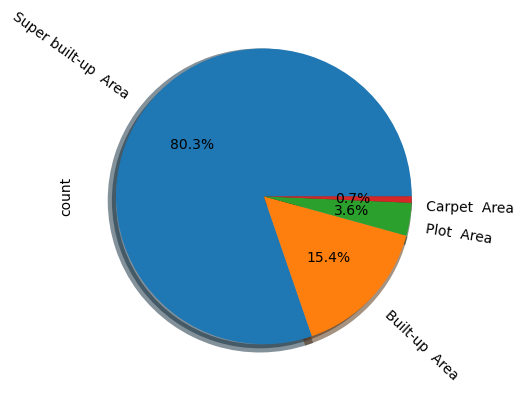

In [406]:
import matplotlib.pyplot as plt
(df["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=1)
plt.show()

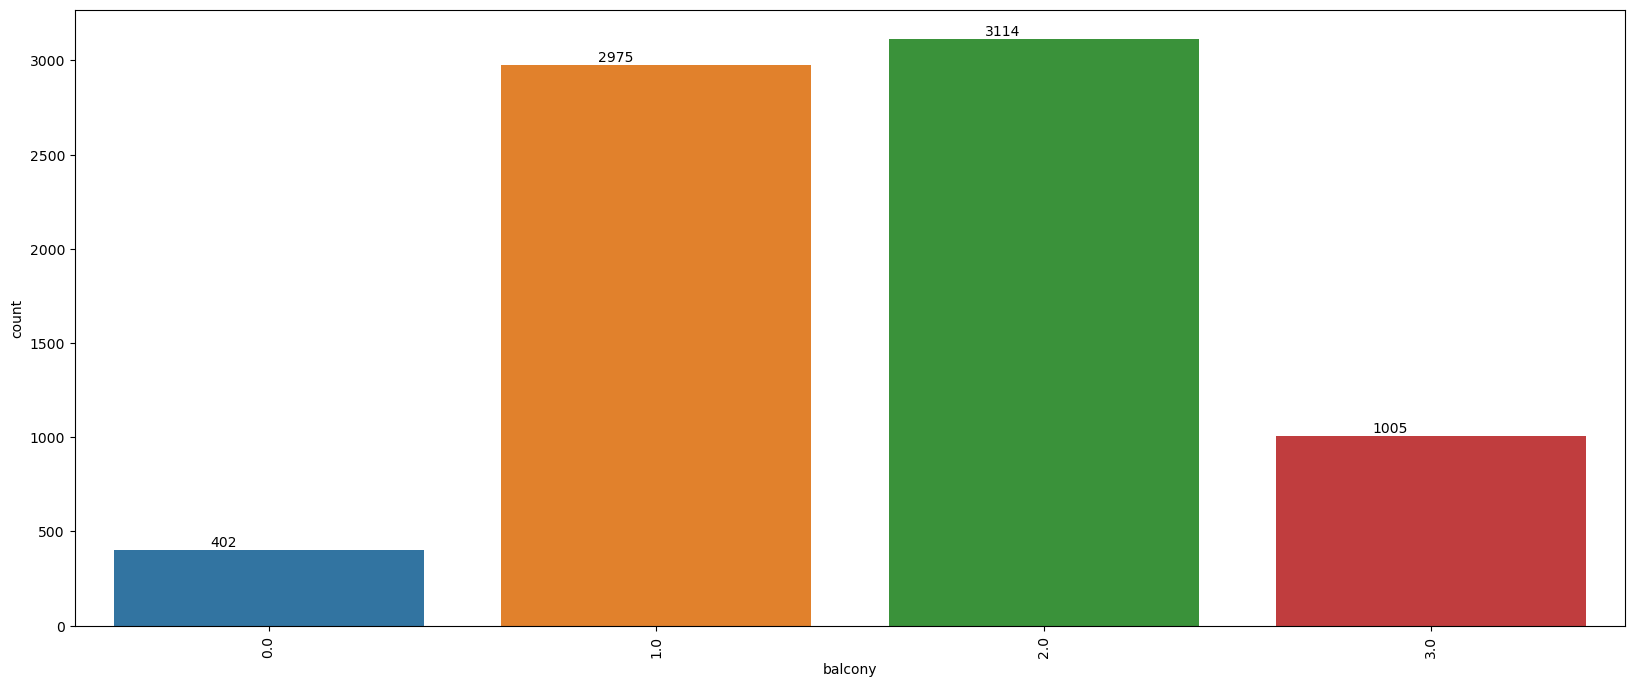

In [407]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

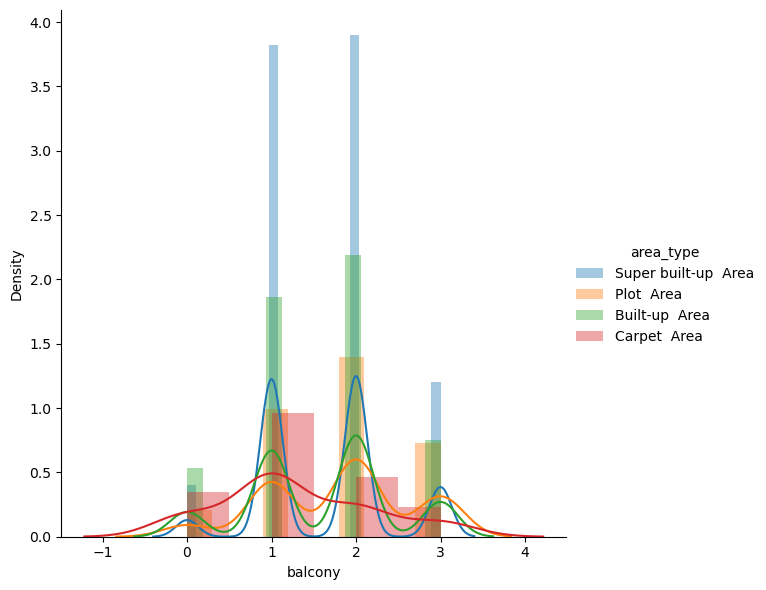

In [408]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

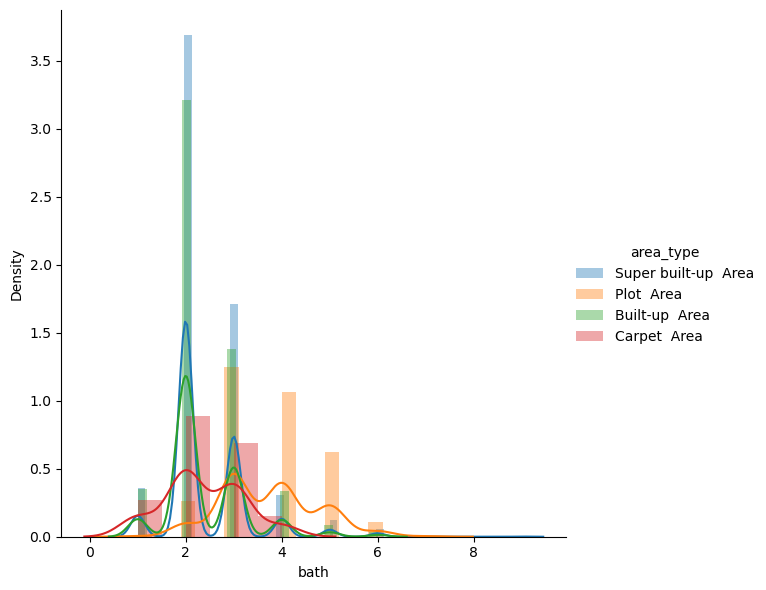

In [409]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

In [433]:

#Convert BHK to integer type


In [411]:
df['bhk'] = df['size'].str.split().str[0]
df['bhk'].dropna(inplace = True)
df['bhk'] = df['bhk'].astype('int')

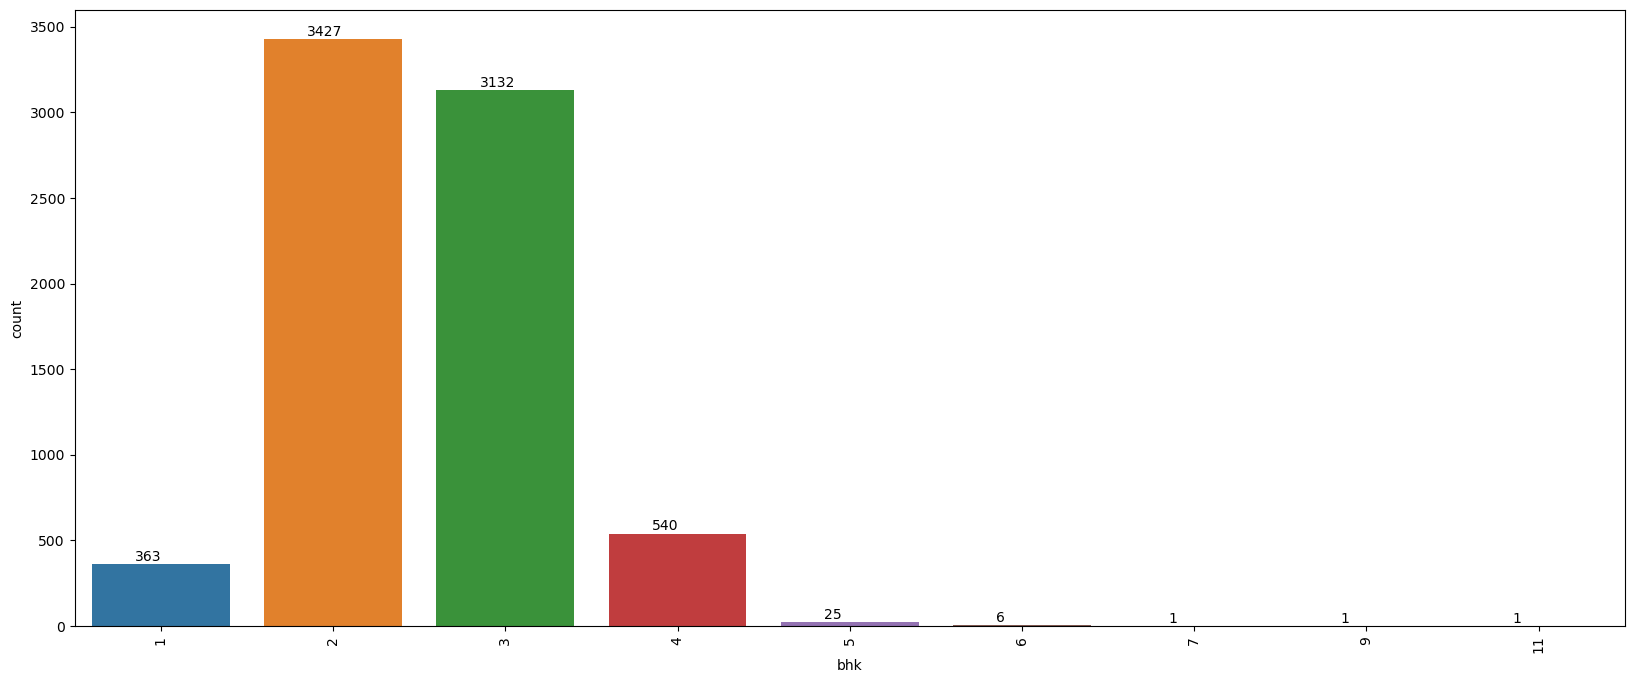

In [412]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'bhk', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

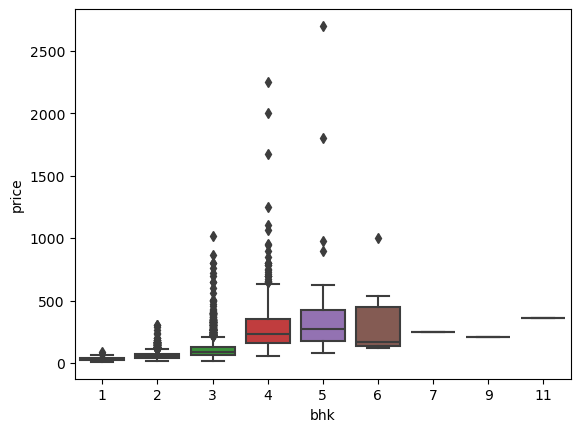

In [413]:
sns.boxplot(x = 'bhk', y = 'price', data = df)
plt.show()

In [414]:
print(df['total_sqft'].iloc[[17]])

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

30    2100 - 2850
Name: total_sqft, dtype: object


In [415]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


In [432]:

#Removing Invalid Data Entries

#Example: The total sqft divided by the number of BHK should always be more than 300


In [416]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(7439, 9)

In [431]:

#Extract Numerical and Categorical Data


In [417]:
numerical = df.select_dtypes(include = 'float64')
categorical = df.select_dtypes(include  = 'object')

In [418]:
import seaborn as sns

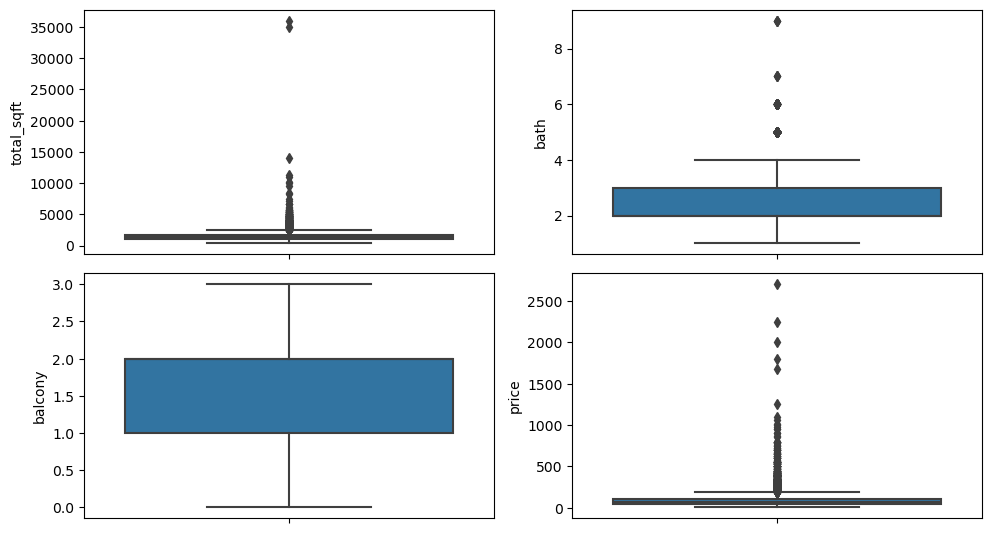

In [419]:
fig = plt.figure(figsize = (10,8))
for index,col in enumerate(numerical):
    plt.subplot(3,2,index+1)
    sns.boxplot(y = numerical.loc[:,col])
fig.tight_layout(pad = 1.0)

In [420]:
df = df.drop(df[df['bath']>6].index)
df = df.drop(df[df['bhk']>7.0].index)

In [421]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


In [430]:

#Taking Values Within 1st Standard Deviation

#As per Normal Distribution, 95% of our data lies within 1st Standard Deviation


In [422]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-sd)) & (subdf.price_per_sqft<=(mean+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(5360, 10)

In [429]:

#Finding Correlation Values

#Removing features highly correlated with each other as they do not provide additional significance to the model


In [423]:
import plotly.graph_objects as go

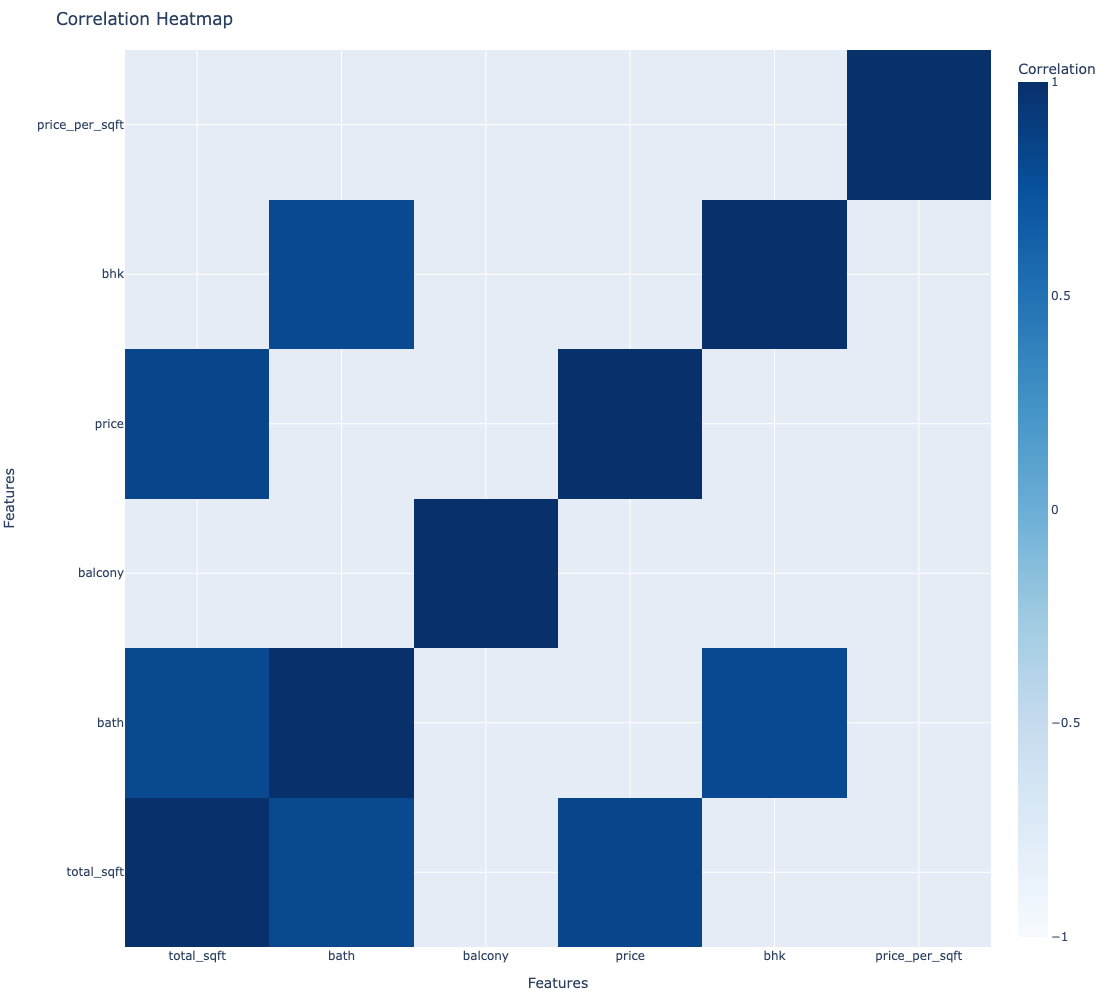

In [424]:
corr = df.corr(numeric_only=True)
mask = corr < 0.8
corr_masked = corr.copy()
corr_masked[mask] = np.nan

fig = go.Figure(data=go.Heatmap(
    z=corr_masked.values,
    x=corr_masked.columns,
    y=corr_masked.columns,
    colorscale='Blues',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlation'),
    showscale=True
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    yaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    height=1000,  
    width=1000,   
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

In [425]:
df.drop(columns=['availability','size','area_type'],inplace = True)

In [428]:

#Checking Dataset with Highest Location Data

#Because having values for a location less than 10 won't provide significant information for the dataset


In [426]:
df.location = df.location.str.strip()
location_counts = df['location'].value_counts(ascending=False)
location_counts

location
Whitefield          357
Sarjapur  Road      237
Electronic City     217
Kanakpura Road      157
Yelahanka           141
                   ... 
Mylasandra            1
Sanne Amanikere       1
Chikka Banaswadi      1
Ferrar Nagar          1
Kammagondahalli       1
Name: count, Length: 428, dtype: int64

In [427]:
#Creating a Series of Locations with Fewer Than 10 Entries
#Identifying locations with less than 10 entries to assess their impact on the dataset

In [308]:
location_counts_less_10 = location_counts[location_counts<=10]
location_counts_less_10

location
Munnekollal         10
Neeladri Nagar      10
Gubbalala           10
Kannamangala        10
Anandapura          10
                    ..
Mylasandra           1
Sanne Amanikere      1
Chikka Banaswadi     1
Ferrar Nagar         1
Kammagondahalli      1
Name: count, Length: 317, dtype: int64

In [310]:
df.location = df.location.apply(lambda x: 'Other' if x in location_counts_less_10 else x)

df = df[df.location != 'Other']

In [439]:
#Checking for bathrooms <= bhk+2

In [440]:
df = df[df.bath<df.bhk+2]

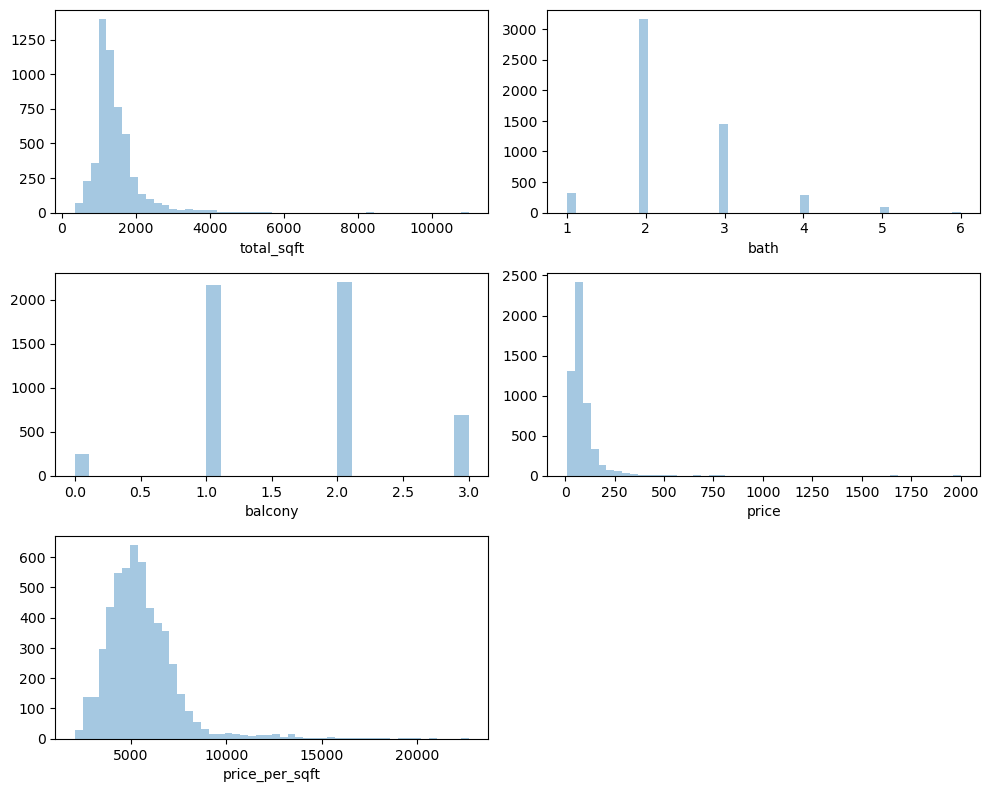

In [441]:
numerical = df.select_dtypes(include = 'float64')
fig = plt.figure(figsize =(10,8))
for index, col in enumerate(numerical):
    plt.subplot(3,2,index+1)
    sns.distplot(numerical.loc[:,col],kde = False)
fig.tight_layout(pad = 1.0)  

In [442]:
#Encoding the categorial variables

In [313]:
dummies = pd.get_dummies(df.location)

In [314]:
df = pd.concat([df,dummies],axis='columns')

df1 = df.drop('location',axis = 1)

df1 = df1.drop(columns=['balcony','price_per_sqft'])

In [315]:
df1.reset_index(drop = True)

,total_sqft,bath,price,bhk,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,550.0,1.0,27.00,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,440.0,1.0,28.00,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,510.0,1.0,25.25,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,510.0,1.0,25.25,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1080.0,2.0,72.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,1169.0,2.0,64.08,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4281,2500.0,3.0,138.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4282,1160.0,2.0,64.08,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4283,2503.0,3.0,138.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [443]:
#Separate the price column

In [316]:
X = df1.drop('price',axis = 1).values 
y = df1.price.values 

In [317]:
y = y[:,np.newaxis]

In [444]:
#Scale the numerical features

In [346]:
from sklearn import preprocessing

In [361]:
Scaler=preprocessing.StandardScaler()
X1 = Scaler.fit_transform(X)

In [445]:
#Model Training

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=10)

In [446]:
#Linear Regression Model, Decision Tree Regression, Random Forest Regressor, Gradient Boosting Regression

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [364]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

In [382]:
model_names = []
mae_Accuracy=[]
rmse_Accuracy=[]
r2_Accuracy=[]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(model.__class__.__name__)
    mae_Accuracy.append(mae)
    rmse_Accuracy.append(rmse)
    r2_Accuracy.append(r2)


In [383]:
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'rmse_Accuracy': rmse_Accuracy,
    'r2_Accuracy': r2_Accuracy,
        })

In [384]:
model_df.sort_values(by='r2_Accuracy',ascending=False)

,Model,mae_Accuracy,rmse_Accuracy,r2_Accuracy
0,LinearRegression,10.070871,14.958011,0.912366
2,RandomForestRegressor,9.176727,15.302816,0.908279
3,GradientBoostingRegressor,11.589150,15.837619,0.901756
1,DecisionTreeRegressor,10.359237,18.049088,0.872404


In [447]:
#Choose the best model and save as a pickle file

In [448]:
import pickle

In [450]:
with open ('house_price_predictor_model.pickle' , 'wb') as f:
    pickle.dump(LinearRegression() ,f)